1. Загрузка данных из заданных файлов

In [1019]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1020]:
track_train = 'C://Users/Маргарита/Documents/Обучение на DA/Библиотеки Python/итоговый проект/train.csv'
track_test = 'C://Users/Маргарита/Documents/Обучение на DA/Библиотеки Python/итоговый проект/test.csv'

In [1021]:
train = pd.read_csv(track_train)
test = pd.read_csv(track_test)

2. Анализ датсета и обработка данных

Описание датасета:

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры (целевая переменная для предсказания)

Рассмотрим поведение целевой переменной Price на предмет 'выбросов'

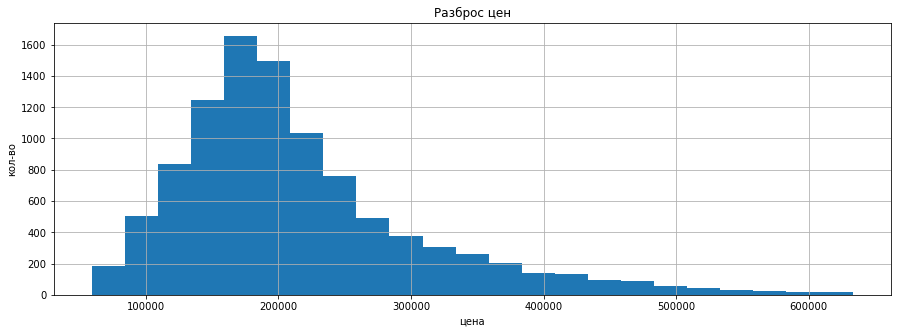

In [1022]:
plt.figure(figsize = (15, 5))

train['Price'].hist(bins=23)
plt.ylabel('кол-во')
plt.xlabel('цена')

plt.title('Разброс цен')
plt.show()

In [1023]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [1024]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

В тренировочном и тестовом датасете набюдается: 1) наличие пропущенных значений; 2) Разные типы данных, в т.ч. тип данных object. 
Пропущенные значения есть в 2 показателях: 1) показатель LifeSquare; 2) показатель Healthcare_1. Оба показателя числовые. Заполним недостающие поля в тренировочном и тестовом датасете: 1)показатель LifeSquare - разницей между площадью квартиры и площадью кухни 2) Показатель Healthcare_1 значением медианы по данному признаку.

In [1025]:
H = train['Healthcare_1'].median()

train['LifeSquare'] = train['LifeSquare'].fillna(train['Square'] - train['KitchenSquare'])
train['Healthcare_1'].fillna(H, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [1026]:
H1 = test['Healthcare_1'].median()

test['LifeSquare'] = test['LifeSquare'].fillna(test['Square'] - test['KitchenSquare'])
test['Healthcare_1'].fillna(H1, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

В датасете так же присутсвуют 3 признака с типом object. Для использования их для обучения модели необходимо привести их в числовые. Это признаки Ecology_2 , Ecology_3 и Shops_2. Далее эти три признака переведем из категориальных в числовые.

In [1027]:
train['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [1028]:
train['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [1029]:
train['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [1030]:
category = {'B' : 1, 'A' : 0}
train['Ecology_2'] = train['Ecology_2'].map(category)
train['Ecology_3'] = train['Ecology_3'].map(category)
train['Shops_2'] = train['Shops_2'].map(category)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [1031]:
test['Ecology_2'] = test['Ecology_2'].map(category)
test['Ecology_3'] = test['Ecology_3'].map(category)
test['Shops_2'] = test['Shops_2'].map(category)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Рассмотрим отдельные показатели датасета и возможные отклонения в них

In [1032]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,41.799474,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,77.823543,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.494155,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,37.040829,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,49.823229,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [1033]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,40.907725,5.976800,8.632000,12.601000,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,0.917600
std,4832.674037,44.179466,0.838594,19.092787,20.321204,9.950018,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.845271,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,36.936106,6.000000,7.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,50.131677,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


Максимальное значение по столбцу года постройки(HouseYear) в тренировочном датасете, площади жилой (LifeSquare) и площади кухни (KitchenSquare) в тренировочном и тестовом датасете указывают на некорректность данных. Жилая площадь и площадь кухни в максимальных значениях превышают максимальное значение площади квартиры, что быть не должно. Заменим значения в строках, в которых наблюдается превышение на разницу между общей площадью квартиры и площадью кухни/ жилой площадью.

In [1034]:
train.loc[train['LifeSquare'] > train['Square'], 'LifeSquare'] = train['Square'] - train['KitchenSquare']
train.loc[train['KitchenSquare'] > train['Square'], 'KitchenSquare'] = train['Square'] - train['LifeSquare']
test.loc[test['LifeSquare'] > test['Square'], 'LifeSquare'] = test['Square'] - test['KitchenSquare']
test.loc[test['KitchenSquare'] > test['Square'], 'KitchenSquare'] = test['Square'] - test['LifeSquare']

Рассмотрим значения в столбце год постройки, чтобы найти оклонения.

In [1035]:
train['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
1499        2020
5701        2020
7076        2020
          ...   
7611        1916
910         1914
5111        1912
2656        1912
9317        1910
Name: HouseYear, Length: 10000, dtype: int64

Значения, превышающие текущий год (20052011 и 4968), заменим на 2020

In [1036]:
train.loc[train['HouseYear'] > 2020, 'HouseYear'] = 2020
train['HouseYear'].sort_values(ascending=False)

1499    2020
790     2020
7076    2020
3357    2020
7459    2020
        ... 
7611    1916
910     1914
5111    1912
2656    1912
9317    1910
Name: HouseYear, Length: 10000, dtype: int64

In [1037]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,40.710165,5.864350,8.526700,12.609400,1984.872400,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,22.129652,5.074565,5.241148,6.775974,18.416347,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.136859,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.345601,1.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,36.714043,6.000000,7.000000,13.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,49.519033,9.000000,12.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [1038]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,40.545203,5.830664,8.632000,12.601000,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,0.917600
std,4832.674037,44.179466,0.838594,19.092787,19.755076,4.644416,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.114019,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.737101,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,36.720889,6.000000,7.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,49.734586,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000
max,16795.000000,212.000000,17.000000,223.453689,168.729035,112.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


Отклонения по столбцам года постройки и площади кухни/ жилой площади исправлены. Рассмотрим корреляцию признаков с целевой переменной Price

In [1039]:
train_corr = train.corr()

In [1040]:
corr_price = pd.DataFrame({'col_names' : train_corr.index, 'price_corr' : train_corr['Price']})
corr_price.sort_values(by = 'price_corr', inplace = True)
corr_price

,col_names,price_corr
Ecology_1,Ecology_1,-0.058381
Ecology_3,Ecology_3,-0.052585
Id,Id,0.009880
Ecology_2,Ecology_2,0.022379
HouseYear,HouseYear,0.036735
Shops_2,Shops_2,0.070388
Social_3,Social_3,0.074878
HouseFloor,HouseFloor,0.088280
Healthcare_1,Healthcare_1,0.128059
Floor,Floor,0.128715


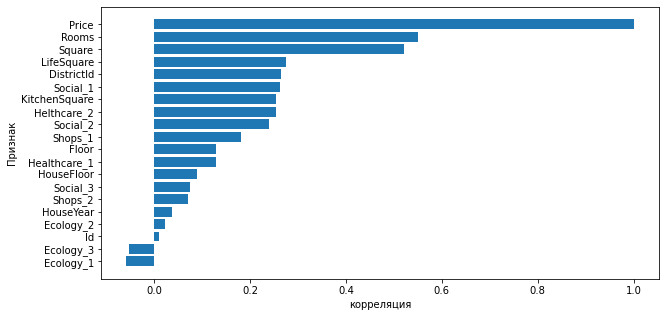

In [1041]:
plt.rcParams['figure.figsize'] = 10, 5
plt.barh(corr_price['col_names'], corr_price['price_corr'])
plt.xlabel("корреляция")
plt.ylabel("Признак")

plt.show()

Признак id явно не влияет на цену (низкая корреляция). Данный признак не будет участвовать в обучении модели.

Добавим еще один признак в датасет: средняя цена квартиры с конкретным количеством комнат в конкретном районе. Данный признак расчитаем в таблице MRD и добавим в датасет train и test. Введение дополнительных признаков позволяет бороться с переобучением модели, позволяет снизсть разниу между R2 на обучающей выборке и R2 на валидационной выборке.

In [1042]:
MRD = train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MRD'})
MRD.head()

,DistrictId,Rooms,MRD
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202706.090239


In [1043]:
train = train.merge(MRD, on=['DistrictId', 'Rooms'], how='left')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [1044]:
test = test.merge(MRD, on=['DistrictId', 'Rooms'], how='left')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

В датасете test не найдено части признаков DistrictId и Rooms, аналогичных train. (поле MRD имеет пустые значения)  дополним пустые значения данными, соответствующими медиане по столбцу.

In [1045]:
MRD1 = test['MRD'].median()
test['MRD'].fillna(MRD1, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Создадим список названий столбцов для дальнейшей работы

In [1046]:
train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'MRD']

In [1047]:
col_name = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 
            'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2','Shops_1','Shops_2', 'MRD']
target_name = 'price'

Загрузим метрики для расчета качества модели и создадим функцию расчета метрики R2 и построения графика соотношения целевой переменной фактической и целевой переменной, предсказанной моделью.

In [1048]:
from sklearn.metrics import r2_score as r2
from math import sqrt

In [1049]:
def metrics(train_values, pred_values):
    print("R2:\t" + str(round(r2(train_values, pred_values), 3)))
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=train_values)
    
    plt.xlabel('Предсказание')
    plt.ylabel('Данные тренировочного датасета')
    plt.title('Соотношение предсказанной цены/ фактицеской цены')
    plt.show()
    return None

3. Получен датасет с числовыми данными,все поля заполнены. На данных можно обучать модель. Выделим целевую переменную (price) и сделаем разбивку данных на тренировочный и валидационный датасеты.

In [1050]:
from sklearn.model_selection import train_test_split

X = train[col_name]
Y = train['Price']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.3, shuffle=True, random_state = 42) 

4. Обучение модели на данных. Применим модель линейной регрессии и оценим качество модели через с помощью R2. 

In [1051]:
final_model = GradientBoostingRegressor(n_estimators = 150, max_depth = 5, random_state=21)
final_model.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=21)

R2:	0.9


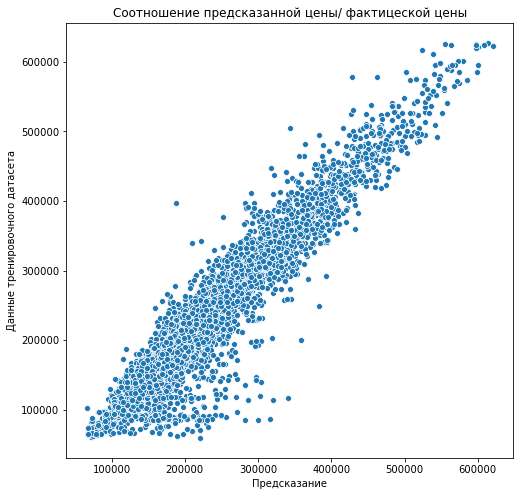

In [1052]:
y_train_preds = final_model.predict(X_train)
metrics(Y_train, y_train_preds)

R2:	0.748


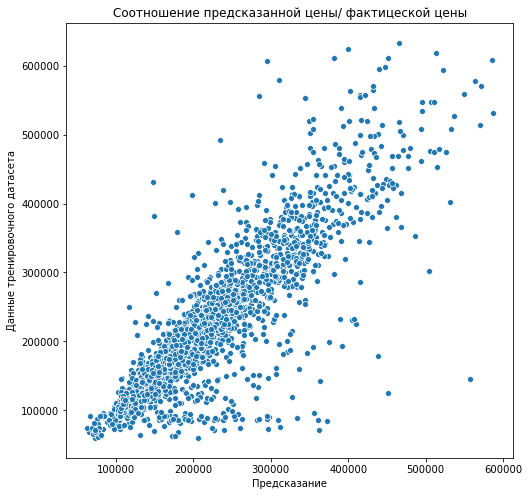

In [1053]:
y_valid_pred = final_model.predict(X_valid)
metrics(Y_valid, y_valid_pred)

Предсказываем цену с помощью обученной модели на данных test

In [1054]:
X_test = test[col_name]
Price_pred = final_model.predict(X_test)

In [1055]:
the_end = pd.DataFrame({'Id' : test['Id'], 'Price' : Price_pred})

In [1056]:
the_end.head()
the_end.shape

(5000, 2)

Сохраняем итоговый результат предсказания цен на тестовых данных в файл csv (путь для сохранения задаем в переменную THE_END)

In [1057]:
THE_END = 'C://Users/Маргарита/Documents/Обучение на DA/Библиотеки Python/итоговый проект/версия 2/MASharova_predictions.csv'
the_end.to_csv(THE_END, sep=';', index=False)